$\newcommand{\n}[1]{\left\|#1 \right\|}$ 
$\renewcommand{\a}{\alpha}             $ 
$\renewcommand{\b}{\beta}              $ 
$\renewcommand{\c}{\gamma}             $ 
$\renewcommand{\d}{\delta}             $ 
$\newcommand{\D}{\Delta}               $ 
$\newcommand{\la}{\lambda}             $ 
$\renewcommand{\t}{\tau}               $ 
$\newcommand{\s}{\sigma}               $ 
$\newcommand{\e}{\varepsilon}          $ 
$\renewcommand{\th}{\theta}            $ 
$\newcommand{\x}{\bar x}               $ 
$\newcommand{\R}{\mathbb R}            $ 
$\newcommand{\N}{\mathbb N}            $ 
$\newcommand{\Z}{\mathbb Z}            $ 
$\newcommand{\E}{\mathcal E}           $ 
$\newcommand{\lr}[1]{\left\langle #1\right\rangle}$
$\newcommand{\nf}[1]{\nabla f(#1)}     $
$\newcommand{\hx}{\hat x}               $
$\newcommand{\hy}{\hat y}               $
$\DeclareMathOperator{\prox}{prox}      $
$\DeclareMathOperator{\argmin}{argmin}  $
$\DeclareMathOperator{\dom}{dom}        $
$\DeclareMathOperator{\id}{Id}          $
$\DeclareMathOperator{\conv}{conv}      $

Consider an example of geometric programming problem for which we add $l_1$--norm:
\begin{equation}
     \min_{x\in \mathbb{R}^d} \sum_{i=1}^m e^{\langle a_i,x \rangle+b_i} + \langle c ,x \rangle + ||x||_1,
\end{equation}
where $a_i,c \in \mathbb{R}^d$, $b\in \mathbb{R}^m$.

In [1]:
import matplotlib.pyplot as plt

from methods.algorithms_terminate import *
from misc.opt_operators import *

%load_ext autoreload
%matplotlib inline
%autoreload 2

We make our random data fixed for the reproducible research. We consider 3 cases below. Choose one of them

In [6]:
d = 200
m = 50
gen = 1
np.random.seed(gen)
A = np.random.uniform( 0,1, (m,d))
b = np.random.uniform(-1,1, m)
c = np.random.uniform(-1,1, d)

In [3]:
d = 500
m = 100
gen = 2
np.random.seed(gen)
A = np.random.uniform( 0,1, (m,d))
b = np.random.uniform(-1,1, m)
c = np.random.uniform(-1,1, d)

In [3]:
d = 1000
m = 100
gen = 3
np.random.seed(gen)
A = np.random.uniform( 0,1, (m,d))
b = np.random.uniform(-1,1, m)
c = np.random.uniform(-1,1, d)

Define all functions

In [7]:
f = lambda x: (np.exp(A.dot(x) + b)).sum() + c.dot(x)

df = lambda x: A.T.dot(np.exp(A.dot(x)+b)) + c

g = lambda x: LA.norm(x,1)

prox_g = lambda x, rho: prox_norm_1(x,rho)

J = lambda x: f(x) + g(x)

Set the number of iterations and the initial point

In [8]:
N = 10000
x0 = np.zeros(d)
#x0 = np.ones(d)*0.5

In [13]:
ans1 = tseng_fbf_linesearch(df, prox_g, x0, delta=1.5, numb_iter=N,tol=1e-6)
ans2 = alg_VI_prox(df, prox_g, x0, numb_iter=N,tol=1e-6)
ans3 = alg_VI_prox_minim(df,prox_g, x0,numb_iter=N, tol=1e-6)
ans4 = fb_cruz_nghia1(df, prox_g, x0, 1,beta=1.5, numb_iter=N, tol=1e-6)
ans5 = fb_cruz_nghia3(f,g,df, prox_g, x0, numb_iter=N, tol=1e-6)

tseng_fbf_linesearch does not terminate after 10000 iterations
---- Alg. 2 ----
Number of iterations: 421
Number of prox_g: 421
Number of F, : 832
Time execution: 0.04
---- Alg. 3 ----
Number of iterations: 367
Number of prox_g: 367
Number of F, : 646
Time execution: 0.03
---- Forward-backward method-1 ----
Number of iterations: 348
Number of prox_g: 732
Number of df, : 732
Time execution: 0.06
---- Forward-backward method-3 ----
Number of iterations: 5122
Number of prox_g: 5212
Number of df, : 5212
Time execution: 0.6


To see the plots of residuals, run

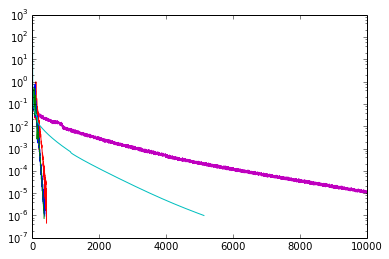

In [14]:
plt.plot(ans1[0], 'm')
plt.plot(ans2[0], 'r')
plt.plot(ans3[0], 'b')
plt.plot(ans4[0], 'g')
plt.plot(ans5[0], 'c')
plt.yscale('log')
plt.show()

If we want to see the convergence plots of the energy $f(x)+g(x)$, we have to import the same algorithms from another module `algorithms`. Those algorithms take for the first argument any function $J$ which depends on $x$ and in every iteration compute $J(x)$.

In [2]:
import methods.algorithms as alg

In [9]:
N = 5000
ans1 = alg.tseng_fbf_linesearch(J, df, prox_g, x0, delta=1.5, numb_iter=N)
ans2 = alg.alg_VI_prox(J, df, prox_g, x0, numb_iter=N)
ans3 = alg.alg_VI_prox_minim(J,df,prox_g, x0,numb_iter=N)
ans4 = alg.fb_cruz_nghia1(J, df, prox_g, x0, 1, beta=1.5, numb_iter=N)
ans5 = alg.fista_linesearch(J, f, df, prox_g, x0, 1, numb_iter=N)

---- FBF ----
Number of iterations: 5000
Number of gradients, n_grad: 15666
Number of prox_g: 10665
Time execution: 0.73930811882
---- Alg. 2 ----
Number of iterations: 5000
Number of gradients, n_grad: 10049
Number of prox_g: 5000
Time execution: 0.58723115921
---- Alg. 3 ----
Number of iterations: 5000
Number of gradients, n_grad: 9055
Number of prox_g: 5000
Time execution: 0.522175073624
---- Cruz forward-backward method 1----
Number of iterations: 5000
Time execution: 0.754177093506
---- FISTA ----
Number of iterations: 5000
Number of function, n_f: 10022
Number of gradients, n_grad: 5022
Number of prox_g: 5022
Time execution: 0.568541049957


We believe that $5000$ iterations is enough to provide a ground truth solution, so for $J_{\min}$ we choose just the minimum from all values `ans1[0]`, `ans2[0]`, ..., `ans5[0]`

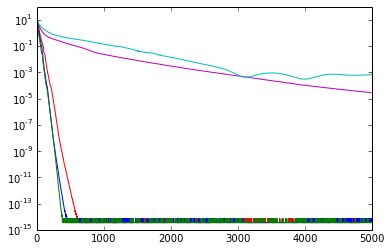

In [17]:
J_min = min(ans1[0]+ans2[0]+ans3[0]+ans4[0]+ans5[0])

plt.plot(ans1[0]-J_min, 'm')
plt.plot(ans2[0]-J_min, 'r')
plt.plot(ans3[0]-J_min, 'b')
plt.plot(ans4[0]-J_min, 'g')
plt.plot(ans5[0]-J_min, 'c')
plt.yscale('log')
plt.show()

To make plots more production like, run

In [10]:
from misc.fancy_plots import *

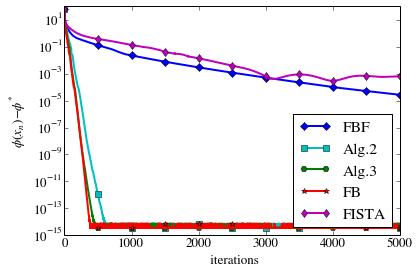

In [11]:
values_list = [ans1[0], ans2[0], ans3[0], ans4[0], ans5[0]]
colors = ['b','c', 'g','r', 'm']
markers = ['D', 's', 'H', '*','d', 'd']
labels = ['FBF', 'Alg.2', 'Alg.3','FB','FISTA']
fancy_plot(values_list, colors, labels, markers, 'geom_progr3.pdf', '$\phi(x_n)-\phi^*$')
plt.show()